# Tools - Pandas
*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

Prerequisites:
* NumPy – if you are not familiar with NumPy, we recommend that you go through the [NumPy tutorial](tools_numpy.ipynb) now.

## Setup
First Let's Import `pandas` Most People Call it `pd`.

In [1]:
import pandas as pd

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

## Creating a `Series`
Let's start by creating our first `Series` object!

In [2]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [3]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [4]:
s + [1000, 2000, 3000, 4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is also called *broadcasting*:

In [5]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index Labels
Each Item in a `Series` object has a **Unique Identifier** Known as *Index Labels*, By Default it is Rank of the Item Which Starts from `0` but You can also Set Them Manually:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=["Praddyumn", "Lav", "Aman", "Aditya"])
s2

Praddyumn     68
Lav           83
Aman         112
Aditya        68
dtype: int64

You can also use `Series` Like a Python `dict`.

In [8]:
s2["Lav"]

83

You can still use inteager Location to get the Elements But Make Sure That it Starts from `0`.

In [9]:
s2[0]

68

To make it Clear to Other Developers and any Other Programm to Understand Weather You are Using `Inteager` Location or `Label` for accessing any Element You can Use `loc` while accessing through `Label` and You can You `iloc` while accessing Through `Inteager` Location.
- `loc` = Accessing Through Label
- `iloc` = Accession Through Inteager Location

In [10]:
s2.loc["Praddyumn"]

68

In [11]:
s2.iloc[0]

68

Slicing a `Series` also slices the index labels:

In [12]:
s2.iloc[1:3]

Lav      83
Aman    112
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [13]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [14]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [15]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [16]:
surprise_slice.iloc[0]

1002

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [17]:
weights = {"Praddyumn": 68, "Lav": 83, "Aman": 86, "Aditya": 68}
s3 = pd.Series(weights)
s3

Praddyumn    68
Lav          83
Aman         86
Aditya       68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [18]:
s4 = pd.Series(weights, index = ["Praddyumn", "Aman"])
s4

Praddyumn    68
Aman         86
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [20]:
print(s3.keys())
print(s4.keys())

s2 + s3

Index(['Praddyumn', 'Lav', 'Aman', 'Aditya'], dtype='object')
Index(['Praddyumn', 'Aman'], dtype='object')


Praddyumn    136
Lav          166
Aman         198
Aditya       136
dtype: int64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"Lav"` is missing from `s2` and `"Aditya"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [21]:
s5 = pd.Series([1000, 1000, 1000, 1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


0           NaN
1           NaN
2           NaN
3           NaN
Aditya      NaN
Aman        NaN
Lav         NaN
Praddyumn   NaN
dtype: float64

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result.

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [22]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` name
A `Series` can have a `name`:

In [23]:
s6 = pd.Series([83, 68], index=["Aman", "Praddyumn"], name="weights")
s6

Aman         83
Praddyumn    68
Name: weights, dtype: int64

## Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the **matplotlib tutorial** Which i Will be Working on in Future. Just import matplotlib and call the `plot()` method:

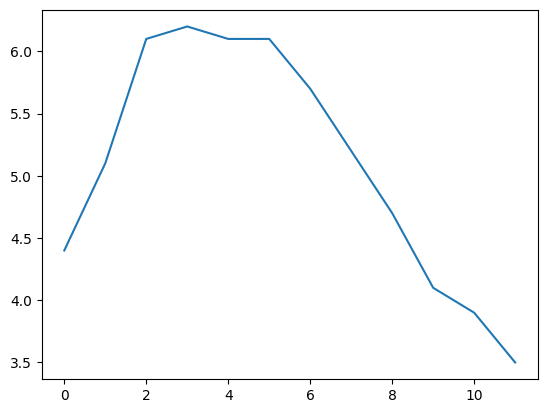

In [24]:
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

There are *many* options for plotting your data. It is not necessary to list them all here: if you need a particular type of plot (histograms, pie charts, etc.), just look for it in the excellent [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) section of pandas' documentation, and look at the example code.